This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [78]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [79]:
train_images.shape

(60000, 28, 28)

In [80]:
len(train_labels)

60000

In [81]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [82]:
test_images.shape

(10000, 28, 28)

In [83]:
len(test_labels)

10000

In [84]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [85]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [86]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [87]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [88]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8757 - loss: 0.4401
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9665 - loss: 0.1150
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9794 - loss: 0.0697
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9845 - loss: 0.0510
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9883 - loss: 0.0392


**Using the model to make predictions**

In [89]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([8.0902121e-09, 2.4182585e-09, 1.9122804e-06, 9.8451301e-06,
       5.8832390e-11, 1.2775012e-09, 5.1241346e-12, 9.9998790e-01,
       2.1803777e-08, 1.6479001e-07], dtype=float32)

In [90]:
predictions[0].argmax()

7

In [91]:
predictions[0][7]

0.9999879

In [92]:
test_labels[0]

7

**Evaluating the model on new data**

In [93]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.0776
test_acc: 0.9804999828338623


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

In [95]:
import numpy as np
x=np.array(12)
x


array(12)

In [ ]:
x.ndim

### Vectors (rank-1 tensors)

In [96]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [101]:
x=np.array([12,4,5,6])
x
x.ndim

1

In [97]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

In [103]:
x=np.array([[4,1,4,2,4],[4,57,7,8,9],[5,3,6,6,3]])
x
x.ndim

2

### Rank-3 and higher-rank tensors

In [104]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [105]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [106]:
train_images.ndim

3

In [107]:
train_images.shape

(60000, 28, 28)

In [108]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

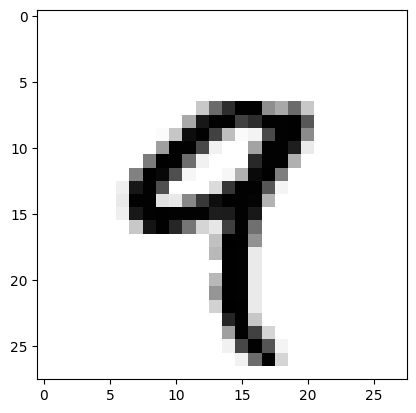

In [110]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [111]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [112]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [113]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [114]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [117]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [118]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### The notion of data batches

In [ ]:
batch = train_images[:128]
batch

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [126]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [137]:
def naive_relu(x):
  assert len(x.shape)==2
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j]=max(x[i,j],0)
  return x

In [127]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [138]:
def naive_add(x,y):
  assert len(x.shape)==2
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j]+= y[i,j]
  return x

In [130]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [145]:
import time
x=np.random.random((20,100))
y=np.random.random((20,100))
t0=time.time()
for _ in range(1000):
  z1=x+y
  z2=np.maximum(z,0.)
print("Took:{0:.2f} s".format(time.time()-t0))

Took:0.01 s


In [140]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.11 s


In [148]:
for _ in range(1000):
  z=naive_add(x,y)
  z= naive_relu(z)
print("Took:{0:.2f} s".format(time.time()-t0))

Took:117.95 s


### Broadcasting

In [150]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
y

array([0.73764152, 0.87666752, 0.33892033, 0.62861269, 0.22053819,
       0.41560629, 0.73973649, 0.60173361, 0.29042654, 0.27760039])

In [152]:
y = np.expand_dims(y, axis=0)
y

array([[[0.73764152, 0.87666752, 0.33892033, 0.62861269, 0.22053819,
         0.41560629, 0.73973649, 0.60173361, 0.29042654, 0.27760039]]])

In [ ]:
Y = np.concatenate([y] * 32, axis=0)
Y

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
x[1]

### Tensor product

In [162]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

7.5479407500453455

In [158]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [159]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [160]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [161]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [163]:
train_images = train_images.reshape((60000, 28 * 28))

In [164]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [165]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [166]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [173]:
import tensorflow as tf
x = tf.Variable(0.)
x
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

grad_of_y_wrt_x


<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [175]:
x = tf.Variable(tf.random.uniform((2, 2)))

with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [176]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.214704 , 1.214704 ],
        [1.8559551, 1.8559551]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [177]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [185]:
import tensorflow as tf
class NaiveDense:
  def __init__(self,input_size,output_size,activation):
    self.activation=activation
    w_shape=(input_size,output_size)
    w_initial_value=tf.random.uniform(w_shape,minval=0,maxval=1e-1)
    self.W=tf.Variable(w_initial_value)

    b_shape=(output_size,)
    b_initial_value=tf.zeros(b_shape)
    self.b=tf.Variable(b_initial_value)

  def __call__(self,inputs):
    return self.activation(tf.matmul(inputs,self.W)+self.b)

  @property
  def weights(self):
    return [self.W,self.b]



inputs = tf.random.uniform((1, 784))
layer=NaiveDense(input_size=784, output_size=10, activation=tf.nn.relu)
outputs=layer(inputs)
outputs

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[19.914661, 19.430555, 20.010721, 20.381239, 19.829973, 20.52692 ,
        20.153313, 19.181322, 20.100855, 19.778656]], dtype=float32)>

#### A simple Sequential class

In [170]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [192]:
class NaiveSequential:
  def __init__(self,layers):
    self.layers=layers

  def __call__(self,inputs):
    x=inputs
    for layer in self.layers:
      x=layer(x)
    return x

  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights
    return weights

In [178]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [193]:
model = NaiveSequential([
    NaiveDense(input_size=28*28,output_size=512,activation=tf.nn.relu),
    NaiveDense(input_size=512,output_size=10,activation=tf.nn.softmax)
])
assert len(model.weights)==4


#### A batch generator

In [204]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [194]:
import math
class BatchGenerator:
  def __init__(self,images,labels,batch_size=128):
    assert len(images)==len(labels)
    self.index=0
    self.images=images
    self.labels=labels
    self.batch_size=batch

  def next(self):
    images=self.images[self.index:self.index+self.batch_size]
    labels=self.labels[self.index:self.index+self.batch_size]
    self.index+=self.batch_size
    return images,labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [195]:
def one_training_step(model,images_batch,labels_batch):
  with tf.GradientTape() as tape:
    predictions=model(images_batch)
    per_sample_losses=tf.keras.losses.sparse_categorical_crossentropy(labels_batch,predictions)
    average_loss=tf.reduce_mean(per_sample_losses)
  gradients=tape.gradient(average_loss,model.weights)
  update_weights(gradients,model.weights)
  return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [196]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [202]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [200]:
def fit(model,images,labels,epochs,batch_size=128):
  for epoch_counter in range(epochs):
    print(f"Epoch {epoch_counter}")
    batch_generator=BatchGenerator(images,labels)
    for batch_counter in range(batch_generator.num_batches):
      images_batch,labels_batch=batch_generator.next()
      loss=one_training_step(model,images_batch,labels_batch)
      if batch_counter%100==0:
        print(f"loss at batch {batch_counter}: {loss:.2f}")

In [203]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0


AttributeError: 'BatchGenerator' object has no attribute 'num_batches'

### Evaluating the model

In [198]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

NotFoundError: Could not find device for node: {{node BatchMatMulV2}} = BatchMatMulV2[T=DT_UINT8, adj_x=false, adj_y=false, grad_x=false, grad_y=false]
All kernels registered for op BatchMatMulV2:
  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_INT32, DT_UINT8, DT_INT16, DT_COMPLEX64, DT_INT64, DT_BFLOAT16, DT_UINT16, DT_COMPLEX128, DT_HALF, DT_UINT32, DT_UINT64]
  device='XLA_GPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_INT32, DT_UINT8, DT_INT16, DT_COMPLEX64, DT_INT64, DT_BFLOAT16, DT_UINT16, DT_COMPLEX128, DT_HALF, DT_UINT32, DT_UINT64]
  device='GPU'; T in [DT_DOUBLE]
  device='GPU'; T in [DT_FLOAT]
  device='GPU'; T in [DT_BFLOAT16]
  device='GPU'; T in [DT_HALF]
  device='GPU'; T in [DT_COMPLEX128]
  device='GPU'; T in [DT_COMPLEX64]
  device='CPU'; T in [DT_INT64]
  device='CPU'; T in [DT_INT32]
  device='CPU'; T in [DT_INT16]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_FLOAT]
  device='CPU'; T in [DT_BFLOAT16]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_COMPLEX128]
  device='CPU'; T in [DT_COMPLEX64]
 [Op:BatchMatMulV2] name: 

In [ ]:
predictions=model(test_images)
predictions=predictions.numpy()
predicted_labels=np.argmax(predictions,axis=1)
matches=predicted_labels==test_labels
print(f"accuracy:{matches.mean():.2f}")

## Summary